In [13]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

from scipy.signal import butter, filtfilt

In [14]:
df = pickle.load(open('./common/df.p', 'rb'))
print(df.head())

                     cpu_usage  memory_usage  bandwidth_inbound   
time                                                              
2023-06-12 11:33:10      0.006         0.374               8.73  \
2023-06-12 11:33:15      0.012         0.374               8.79   
2023-06-12 11:33:20      0.008         0.374               8.77   
2023-06-12 11:33:25      0.008         0.374               8.74   
2023-06-12 11:33:30      0.008         0.374               8.88   

                     bandwidth_outbound  tps  response_time  
time                                                         
2023-06-12 11:33:10                6.42  0.2           15.1  
2023-06-12 11:33:15                6.49  0.2           20.1  
2023-06-12 11:33:20                6.46  0.2           14.3  
2023-06-12 11:33:25                6.44  0.2           18.9  
2023-06-12 11:33:30                6.53  0.2           17.5  


### Observing data

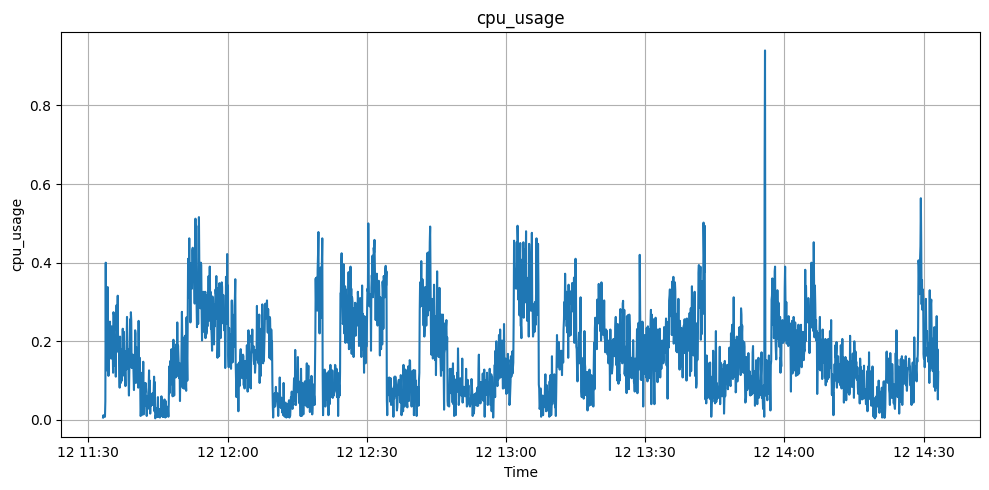

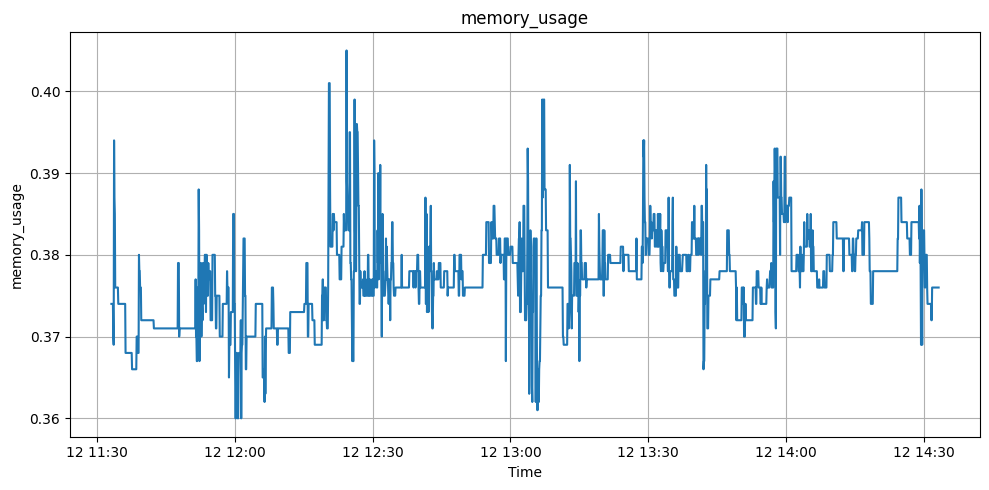

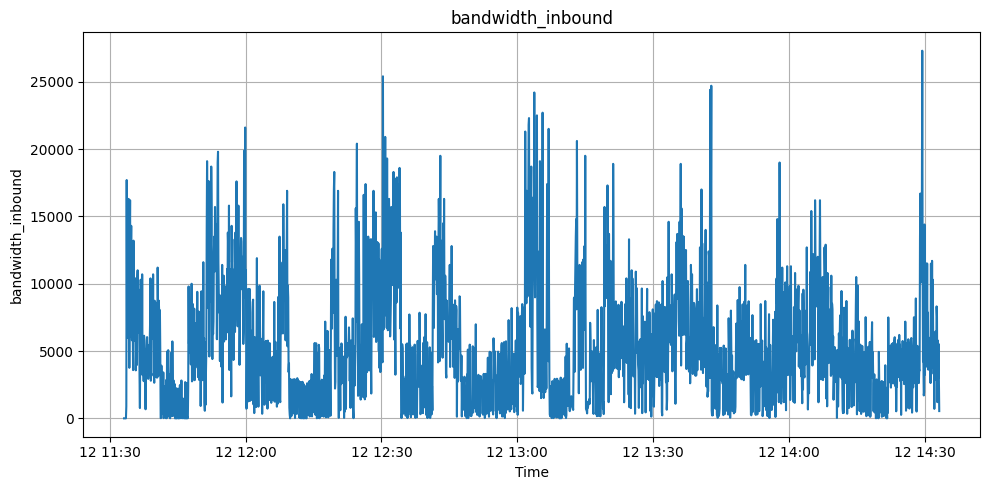

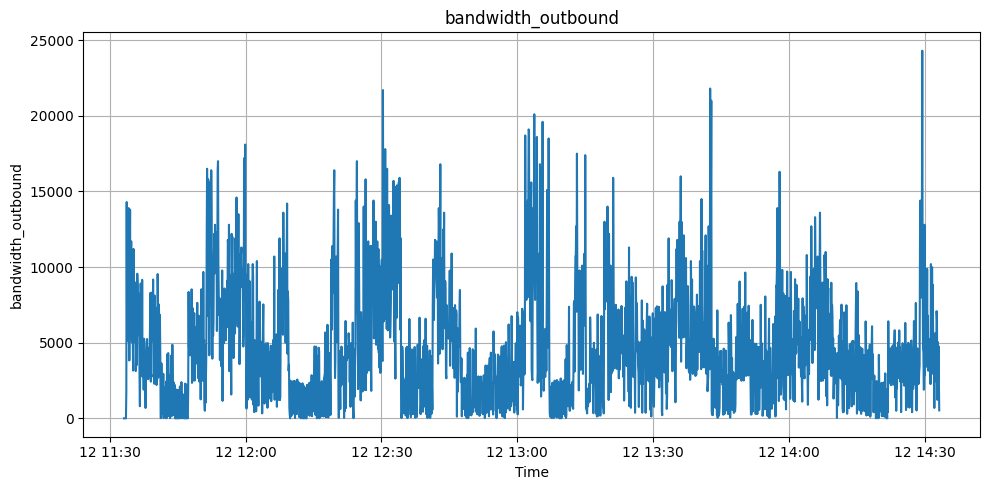

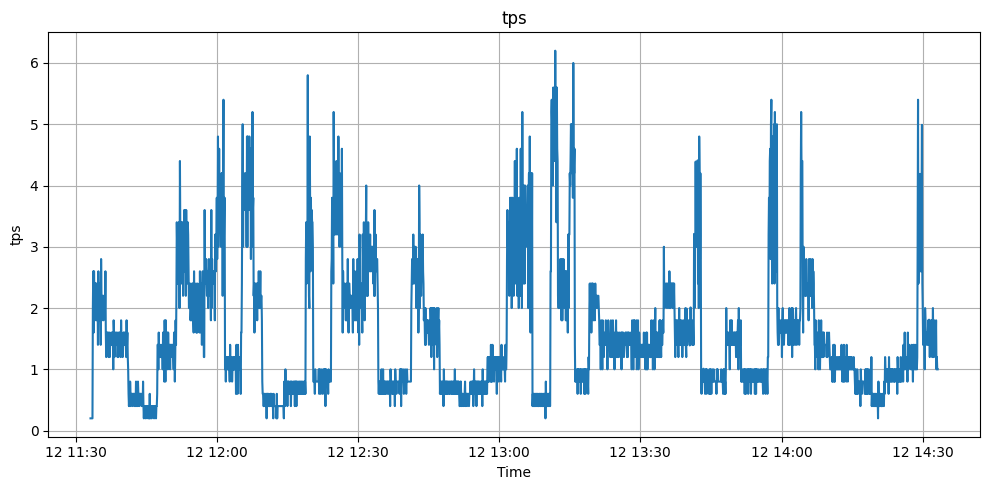

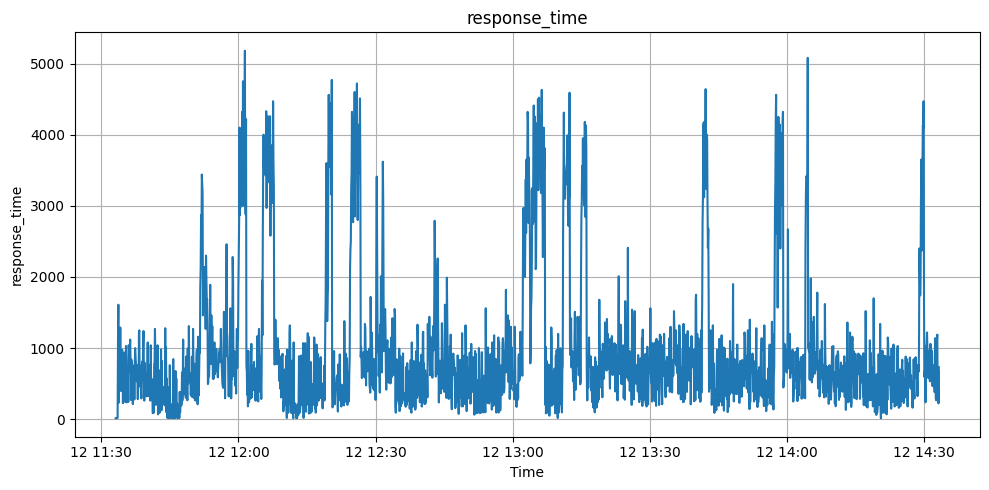

In [15]:
# Plotting each feature
for column in df.columns:
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df[column])  # Removed the marker argument
    plt.title(column)
    plt.xlabel('Time')
    plt.ylabel(column)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Reducing noise

In [16]:
# Define the Butterworth filter
def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

In [17]:
# Filter settings: Choose your values based on the data characteristics
fs = 5       # sampling frequency (e.g., 5 samples per second in your data since it's sampled every 5 seconds)
cutoff = 0.8  # desired cutoff frequency
order = 3     # order of the filter

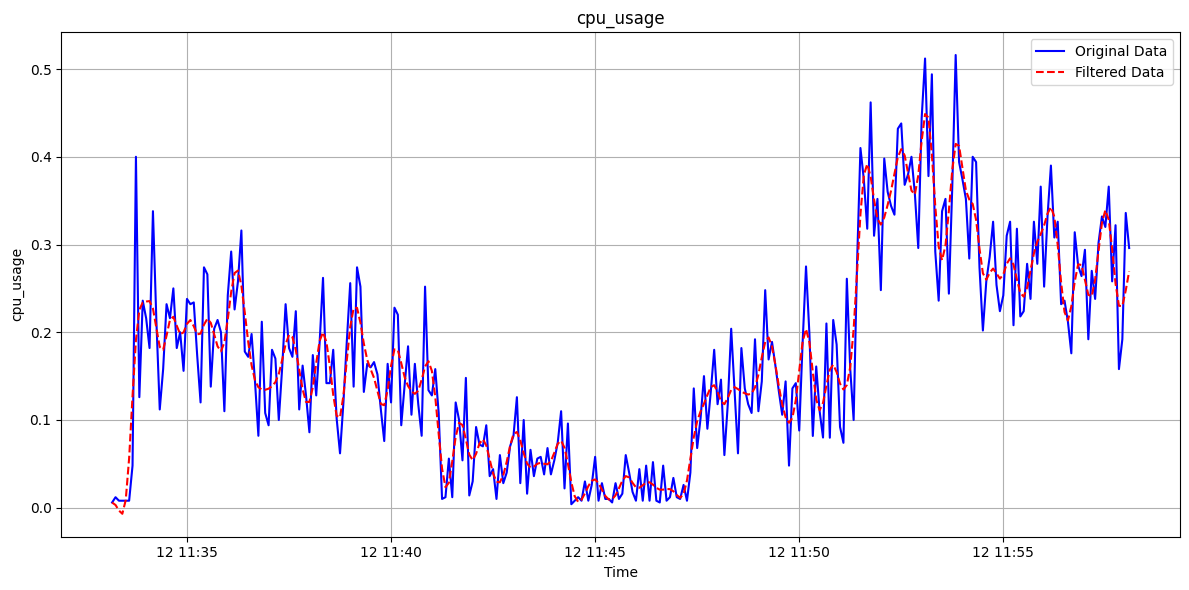

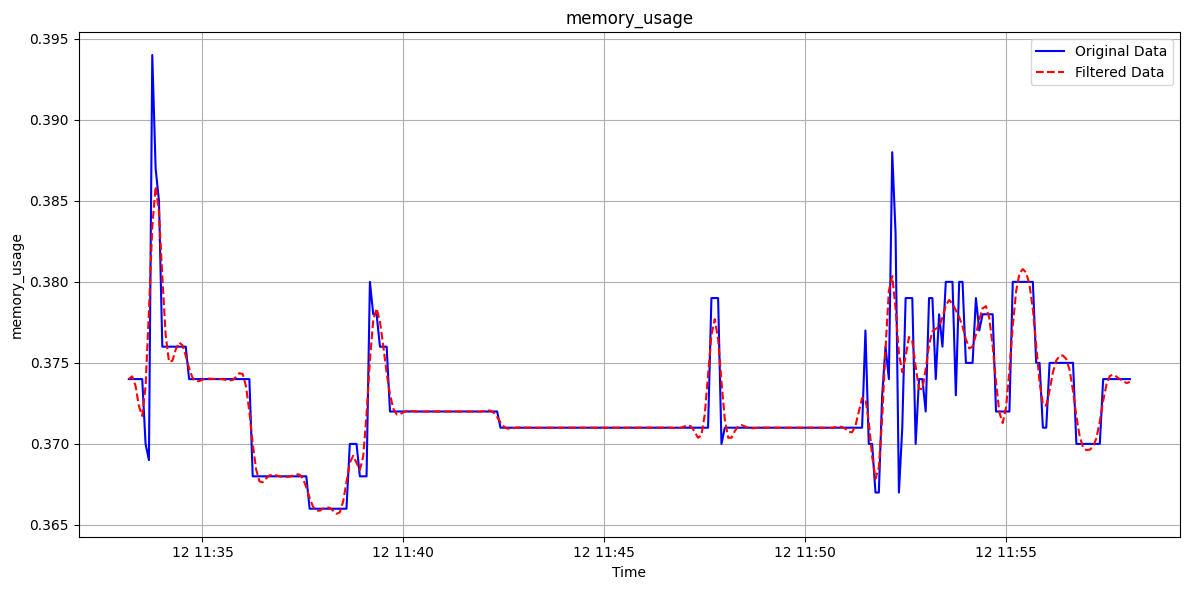

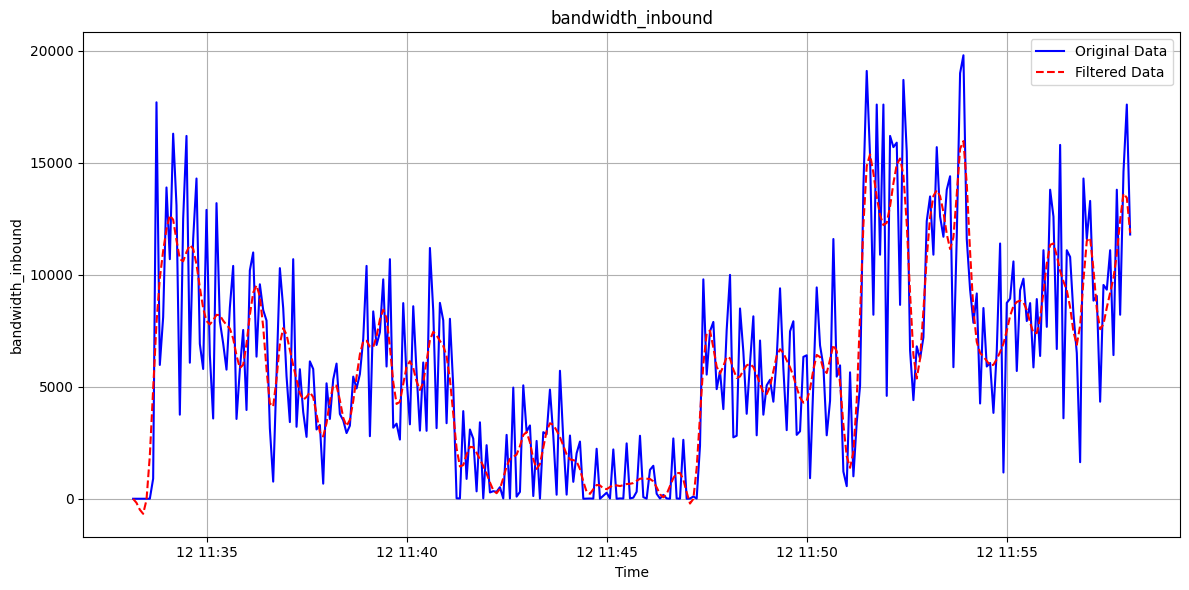

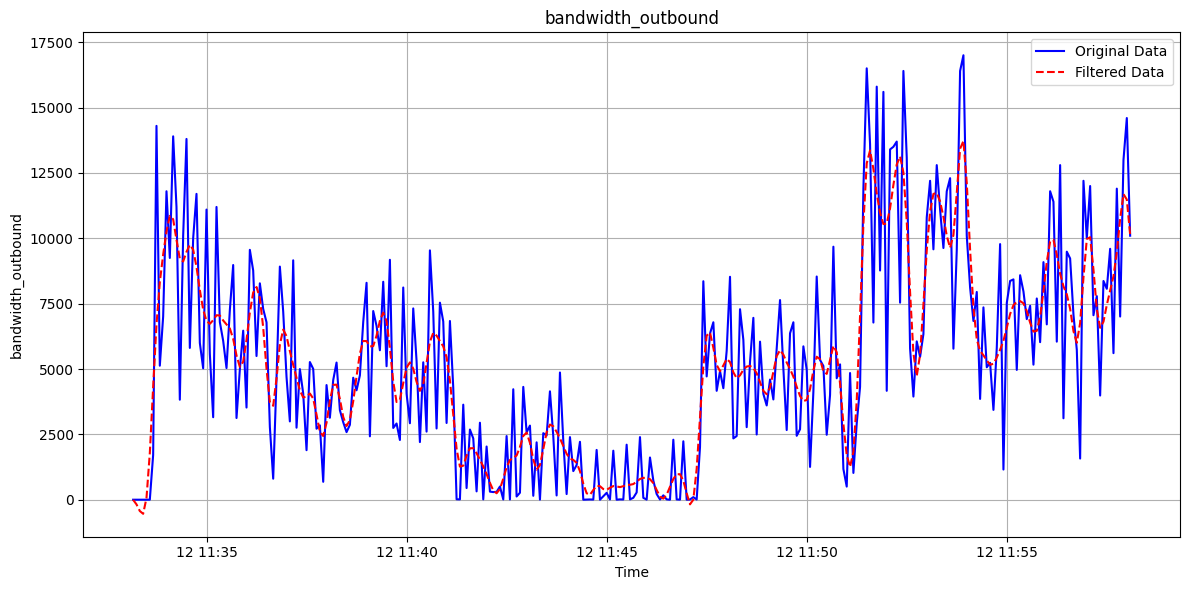

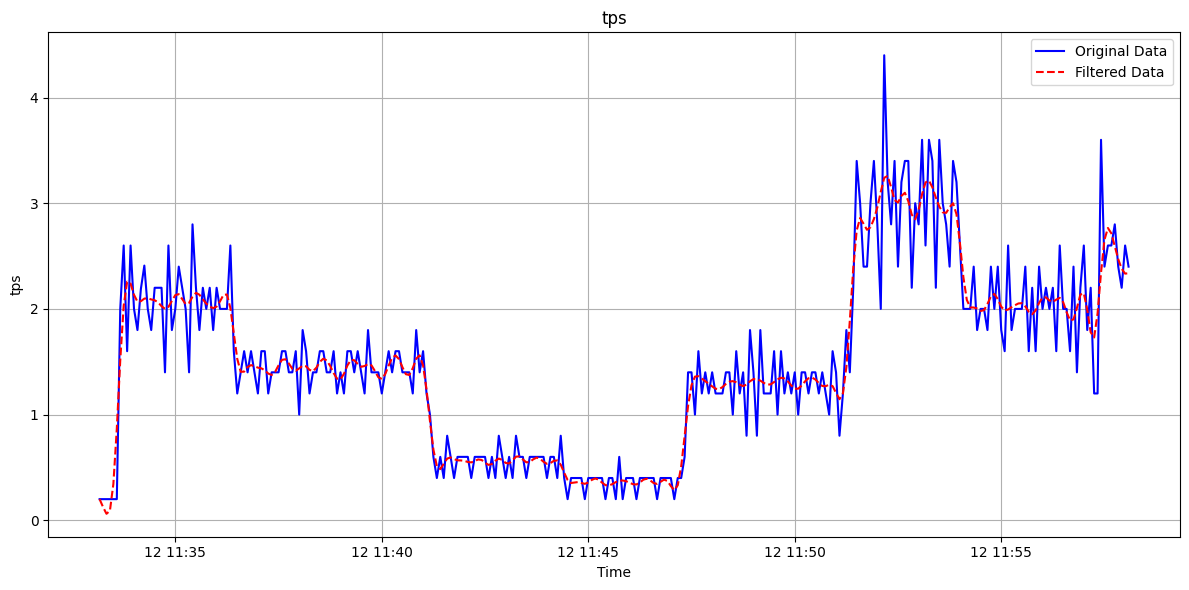

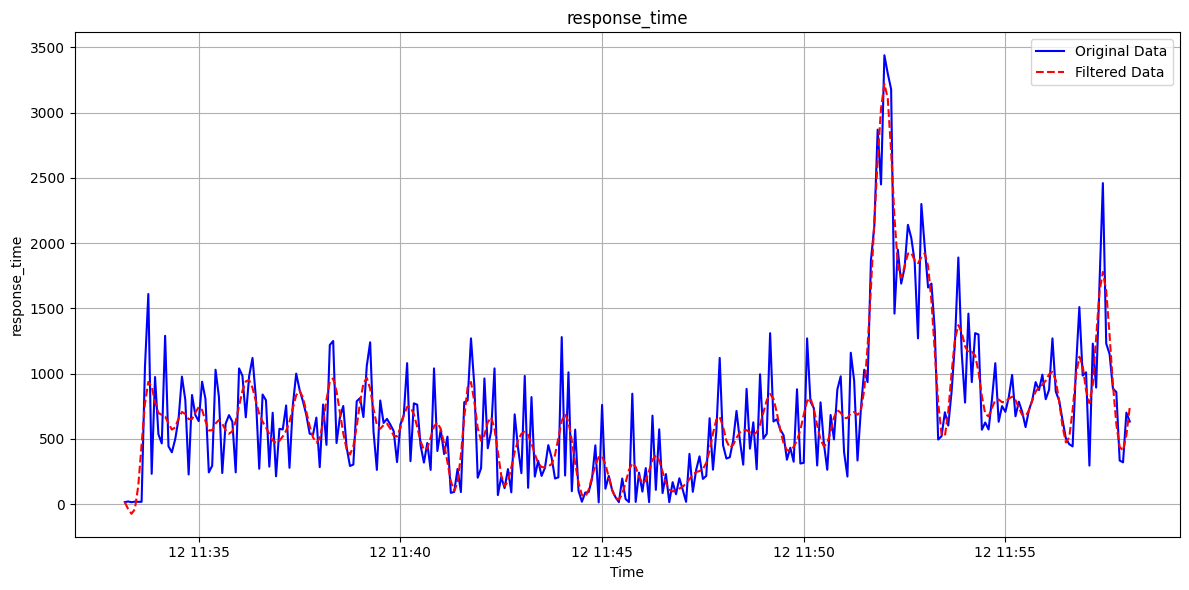

In [20]:
filtered_df = pd.DataFrame(index=df.index)

for column in df.columns:
    filtered_data = butter_lowpass_filter(df[column], cutoff, fs, order)
    filtered_df[column] = filtered_data


    # Plotting both original and filtered data (same as before)
    plt.figure(figsize=(12, 6))
    # plt.plot(df.index, df[column], label='Original Data', color='blue')
    # plt.plot(df.index, filtered_data, label='Filtered Data', color='red', linestyle='--')
    rows_count = 300
    plt.plot(df.index[:rows_count], df[column][:rows_count], label='Original Data', color='blue')
    plt.plot(df.index[:rows_count], filtered_data[:rows_count], label='Filtered Data', color='red', linestyle='--')
    plt.title(column)
    plt.xlabel('Time')
    plt.ylabel(column)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Exporting data

In [19]:
pickle.dump(filtered_df, open("./common/filtered_df.p", "wb"))